In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cgpa_iq.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


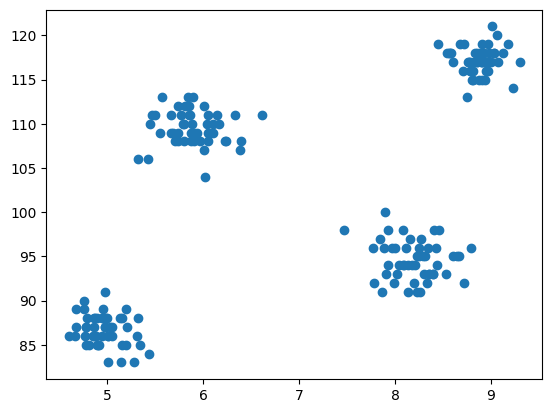

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 514.1616803171116,
 412.2287691506906,
 302.653499358208,
 233.54082485509014,
 199.9912003256784,
 181.10862997455553]

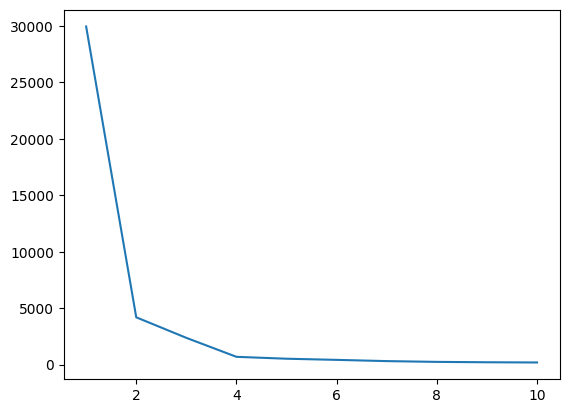

In [ ]:
plt.plot(range(1,11),wcss) #visualize the WCSS values and look for an "elbow point" in the plot

In [ ]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
#The resulting y_means is an array of cluster labels, where each element corresponds to the cluster assignment for a data point in X.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_means

array([3, 2, 1, 1, 2, 2, 1, 0, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 3,
       1, 3, 3, 1, 3, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 3, 2, 3, 1, 1, 3,
       0, 0, 1, 2, 0, 2, 3, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 3, 0,
       1, 3, 2, 1, 2, 0, 1, 3, 2, 0, 2, 0, 3, 1, 1, 0, 2, 3, 0, 3, 0, 2,
       0, 2, 0, 0, 1, 3, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 3, 3, 1, 3, 0, 0,
       1, 0, 2, 2, 1, 0, 1, 2, 0, 3, 3, 2, 1, 0, 1, 3, 1, 2, 3, 1, 1, 2,
       3, 3, 2, 0, 2, 3, 1, 1, 1, 3, 2, 3, 3, 0, 3, 0, 2, 3, 0, 3, 0, 0,
       3, 1, 2, 0, 2, 1, 3, 0, 2, 1, 0, 3, 2, 3, 3, 0, 0, 2, 0, 3, 3, 1,
       0, 2, 3, 0, 0, 2, 2, 2, 1, 3, 1, 1, 0, 2, 1, 1, 3, 3, 1, 3, 0, 2,
       2, 0], dtype=int32)

In [ ]:
X[y_means == 3,1]
#the expression X[y_means == 3, 1] will give you an array containing the values of the second feature (column) of all data points that belong to cluster 3.
#This can be useful for analyzing or visualizing the distribution of that particular feature within the cluster.

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

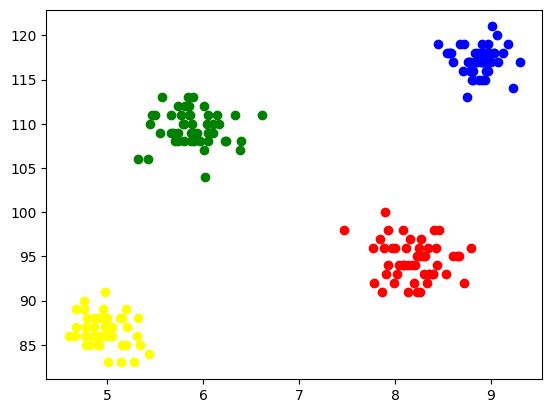

In [ ]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

In [ ]:
from sklearn.datasets import make_blobs
# Define the centroids (centers) for the clusters
centroids = [(-5, -5, 5), (5, 5, -5), (3.5, -2.5, 4), (-2.5, 2.5, -4)]
# Define the standard deviation for each cluster
cluster_std = [1, 1, 1, 1]
# Generate synthetic data with specified parameters
X, y = make_blobs(
    n_samples=200,          # Total number of data points
    cluster_std=cluster_std, # Standard deviation for each cluster
    centers=centroids,      # Cluster centers
    n_features=3,           # Number of features (dimensions) for each data point
    random_state=1          # Random seed for reproducibility
)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [ ]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

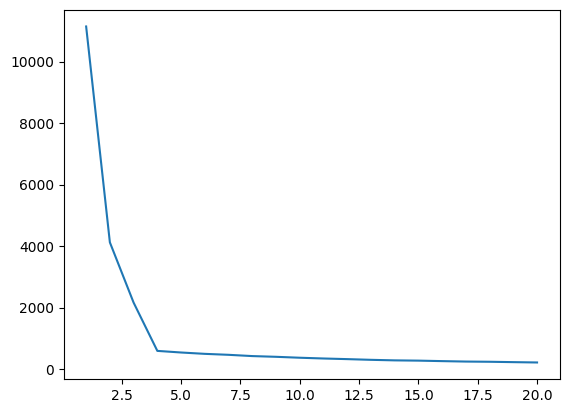

In [ ]:
plt.plot(range(1,21),wcss)

In [ ]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df = pd.DataFrame()
df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()